# Importing Required libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [111]:
df=pd.read_csv(r"C:\Users\HRIDVI ARORA\Downloads\loan_prediction.csv")

In [112]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [113]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [115]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that most of the columns are having missing values which needs to be filled.

In [116]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [117]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [118]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [119]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [120]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [121]:
#Seperating columns with null values in Categorical 

null_cols_cat=['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']

In [122]:
#Separating columns with null values in Continous 

null_cols_cont=['LoanAmount']

In [123]:
for i in df[null_cols_cat]:
    df[i]=df[i].fillna(df[i].mode()[0])

Filling Nan with mode() of that particular columns as they are categorical.

In [124]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

Repalcing Nan values with mean()

In [125]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can observe that all Null values are replaced.

# Description of Dataset

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


# Separating categorical variable and continous variable

In [127]:
#Checking for Categorical columns
Cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Cat_col.append(i)
print(Cat_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [128]:
# Checking for Continous columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# EDA

Male      502
Female    112
Name: Gender, dtype: int64


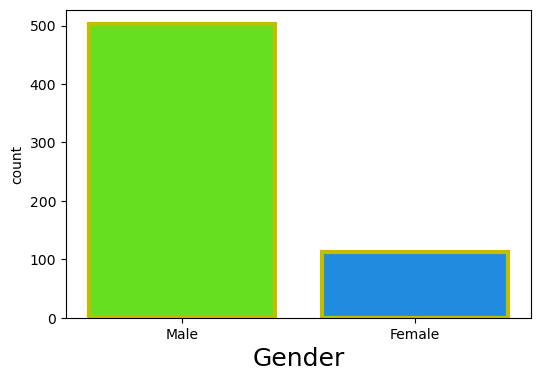

In [129]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Gender',data=df,edgecolor="y",linewidth=3,palette="gist_rainbow")
plt.xlabel('Gender',fontsize=18)
print(df['Gender'].value_counts())

There are more number of Male applicants than Female applicants. The total number of male applicants are 502 whereas female numbers are just 112.

Yes    401
No     213
Name: Married, dtype: int64


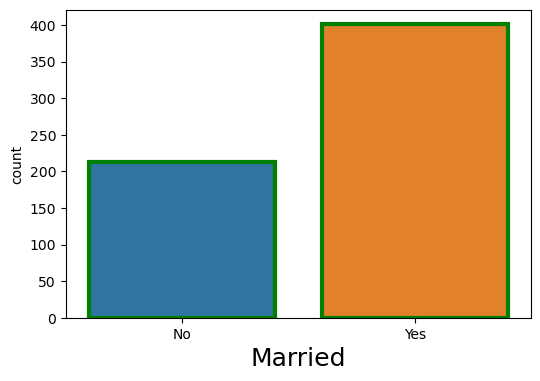

In [130]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Married',data=df,edgecolor="g",linewidth=3)
plt.xlabel('Married',fontsize=18)
print(df['Married'].value_counts())

The number of married applicants who have applied for loan are 401 whereas the unmarried applicants are 213.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


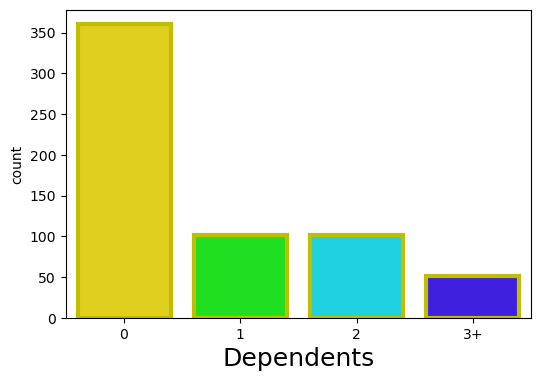

In [131]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Dependents',data=df,edgecolor="y",linewidth=3,palette="gist_rainbow")
plt.xlabel('Dependents',fontsize=18)
print(df['Dependents'].value_counts())

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


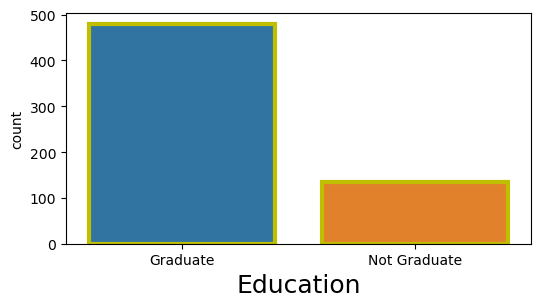

In [132]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x='Education',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Education',fontsize=18)
print(df['Education'].value_counts())

The count of Graduate applicants is high in counts means the maximum number of Graduated applicants are applying for the loan.

No     532
Yes     82
Name: Self_Employed, dtype: int64


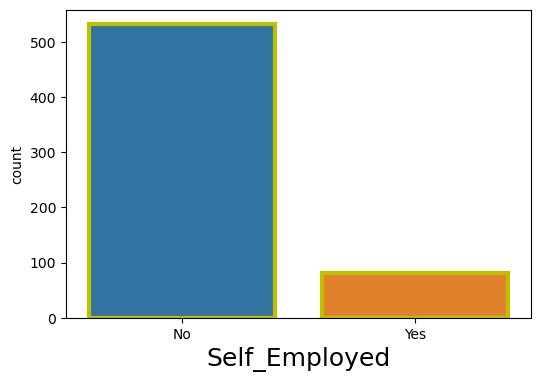

In [133]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Self_Employed',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Self_Employed',fontsize=18)
print(df['Self_Employed'].value_counts())

Most of the applicants are not self employed that means they might be working in the public sectors and only 82 applicants are self employed and running their own business.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


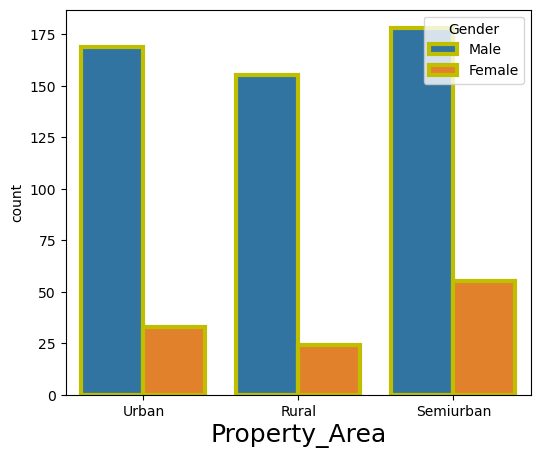

In [134]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='Property_Area',hue='Gender',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Property_Area',fontsize=18)
print(df['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


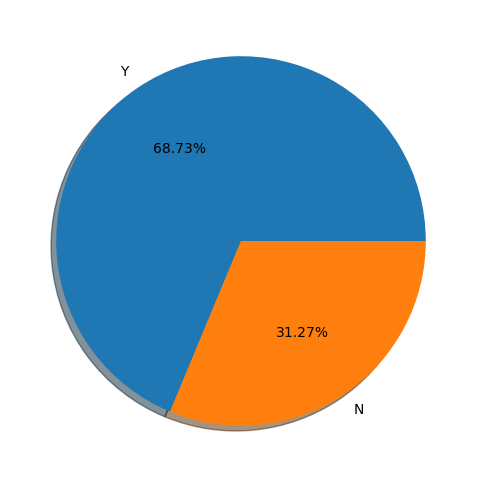

In [135]:
print(df['Loan_Status'].value_counts())
labels='Y','N'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['Loan_Status'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

The count of "Y" is maximum as compared to "N" that means total 422 applicants got loan whereas 192 applicants got rejected.

We can also notice the imbalance of the class, and it needs to get balance using over_sampling method to increase the instances of minority class.

In [136]:
df_cont=df[num_col]

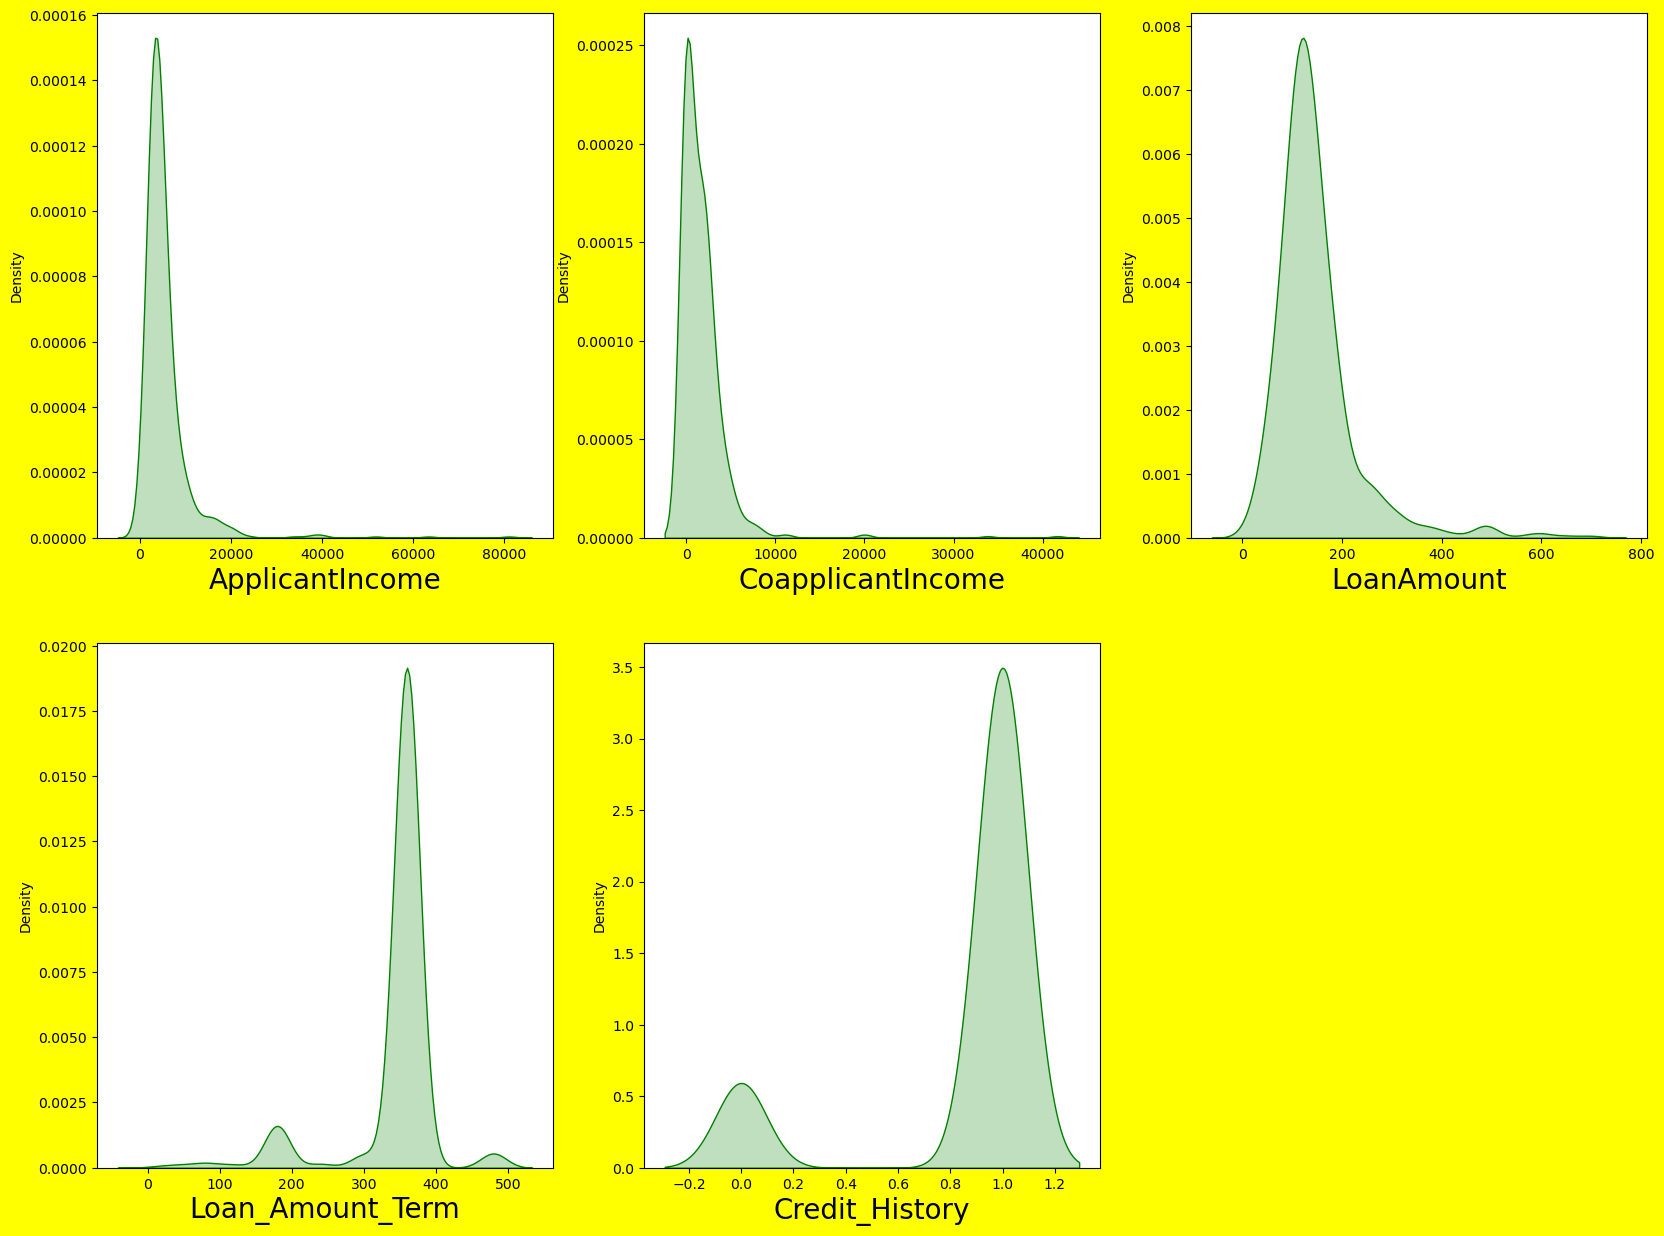

In [137]:
#Lets check the distribution of continous columns
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df_cont:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_cont[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

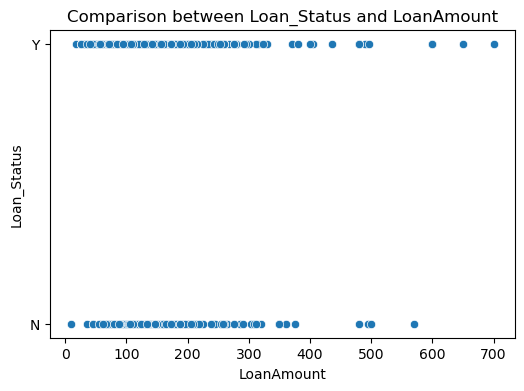

In [138]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and LoanAmount")
sns.scatterplot(df['LoanAmount'],df['Loan_Status'],data = df)
plt.xlabel("LoanAmount")
plt.ylabel("Loan_Status")
plt.show()

We can observe that LoanAmount is continous till 400.

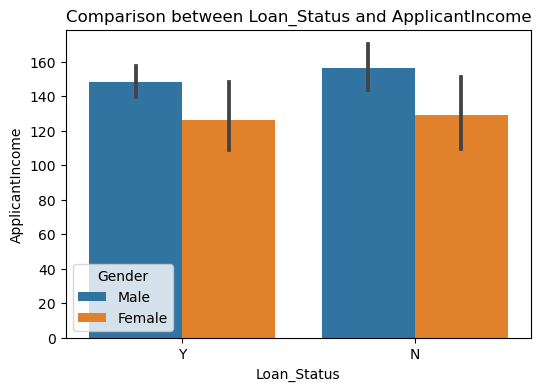

In [139]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and ApplicantIncome")
sns.barplot(df['Loan_Status'],df['LoanAmount'],hue='Gender',data = df)
plt.ylabel("ApplicantIncome")
plt.xlabel("Loan_Status")
plt.show()

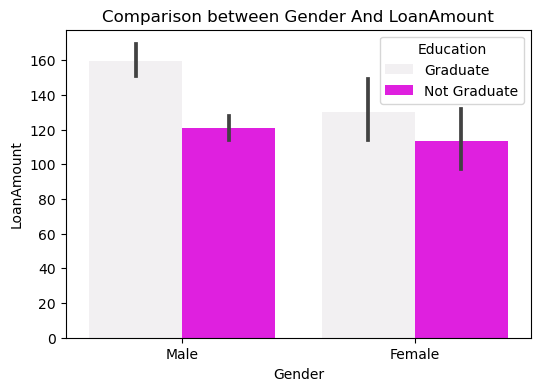

In [140]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Gender And LoanAmount")
sns.barplot(df['Gender'],df['LoanAmount'],data = df,hue='Education',color='Magenta')
plt.ylabel("LoanAmount")
plt.xlabel("Gender")
plt.show()

We can observe that LoanAmount is more in males which are graduated.

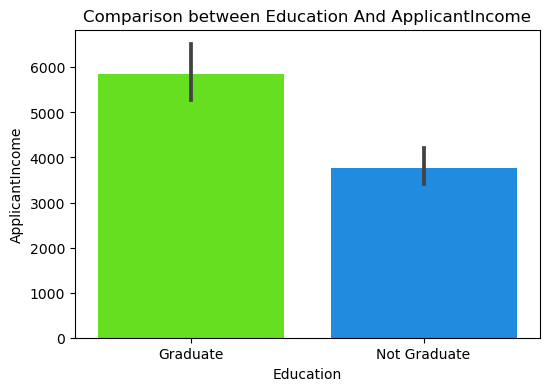

In [141]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Education And ApplicantIncome")
sns.barplot(df['Education'],df['ApplicantIncome'],data = df,palette="gist_rainbow")
plt.ylabel("ApplicantIncome")
plt.xlabel("Education")
plt.show()

We can observe that income is more of Graduates.

<AxesSubplot:>

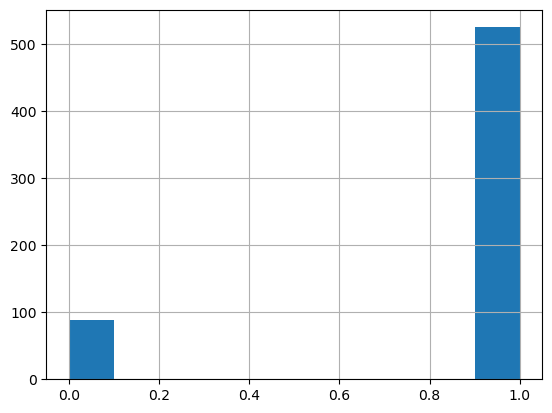

In [142]:
df['Credit_History'].hist()

We can observe that Loan sanctioned frequency is more than denials.

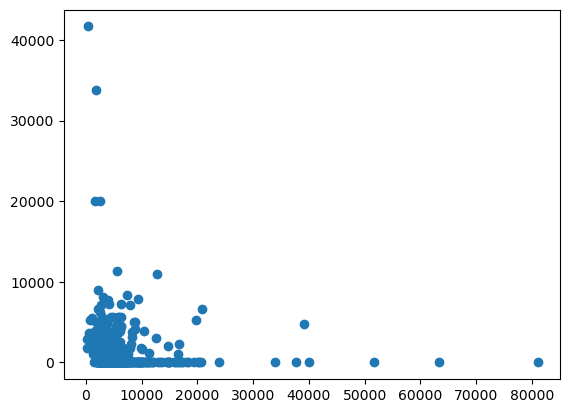

In [143]:
plt.scatter(df['ApplicantIncome'],df['CoapplicantIncome'])

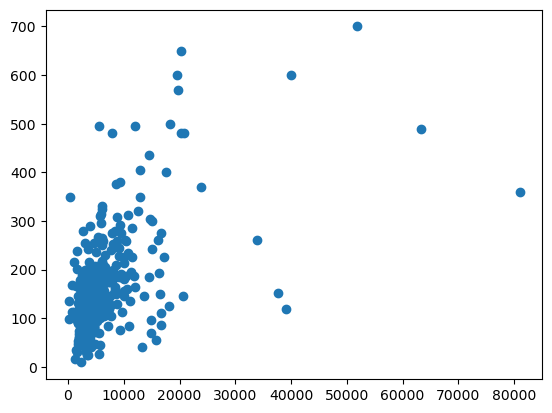

In [144]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])

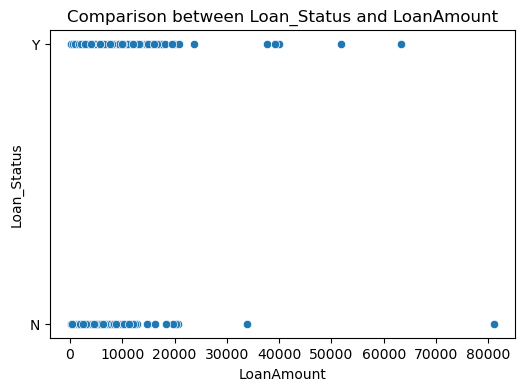

In [145]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and LoanAmount")
sns.scatterplot(df['ApplicantIncome'],df['Loan_Status'],data = df)
plt.xlabel("LoanAmount")
plt.ylabel("Loan_Status")
plt.show()

Loan Amount is continous till 20k.

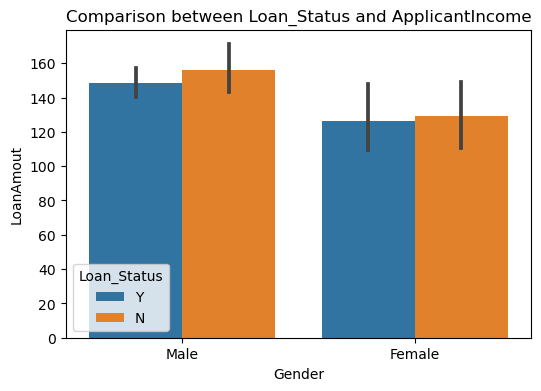

In [146]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and ApplicantIncome")
sns.barplot(df['Gender'],df['LoanAmount'],hue='Loan_Status',data = df)
plt.ylabel("LoanAmout")
plt.xlabel("Gender")
plt.show()

# Now using encoder to encode the target variable

In [147]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [148]:
df=df.drop(columns=['Loan_ID'],axis=1)

In [149]:
Cat_col.remove("Loan_ID")

In [150]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

for i in Cat_col:
    df[i]=enc.fit_transform(df[i])
    

In [151]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

We can observe that all categorical columns are encoded into numerical.

# Checking for Corrrelation

# Plotting heatmap

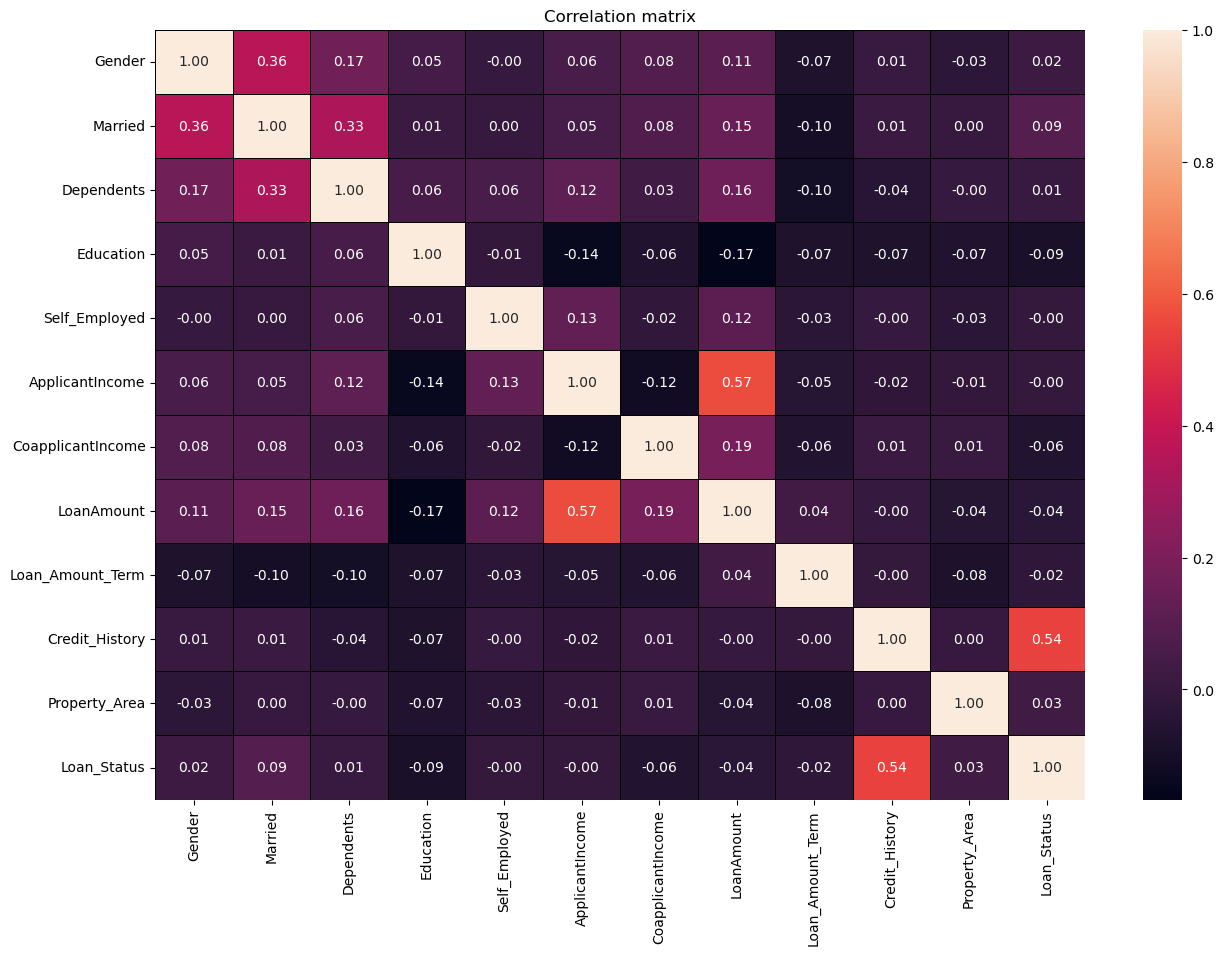

In [152]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

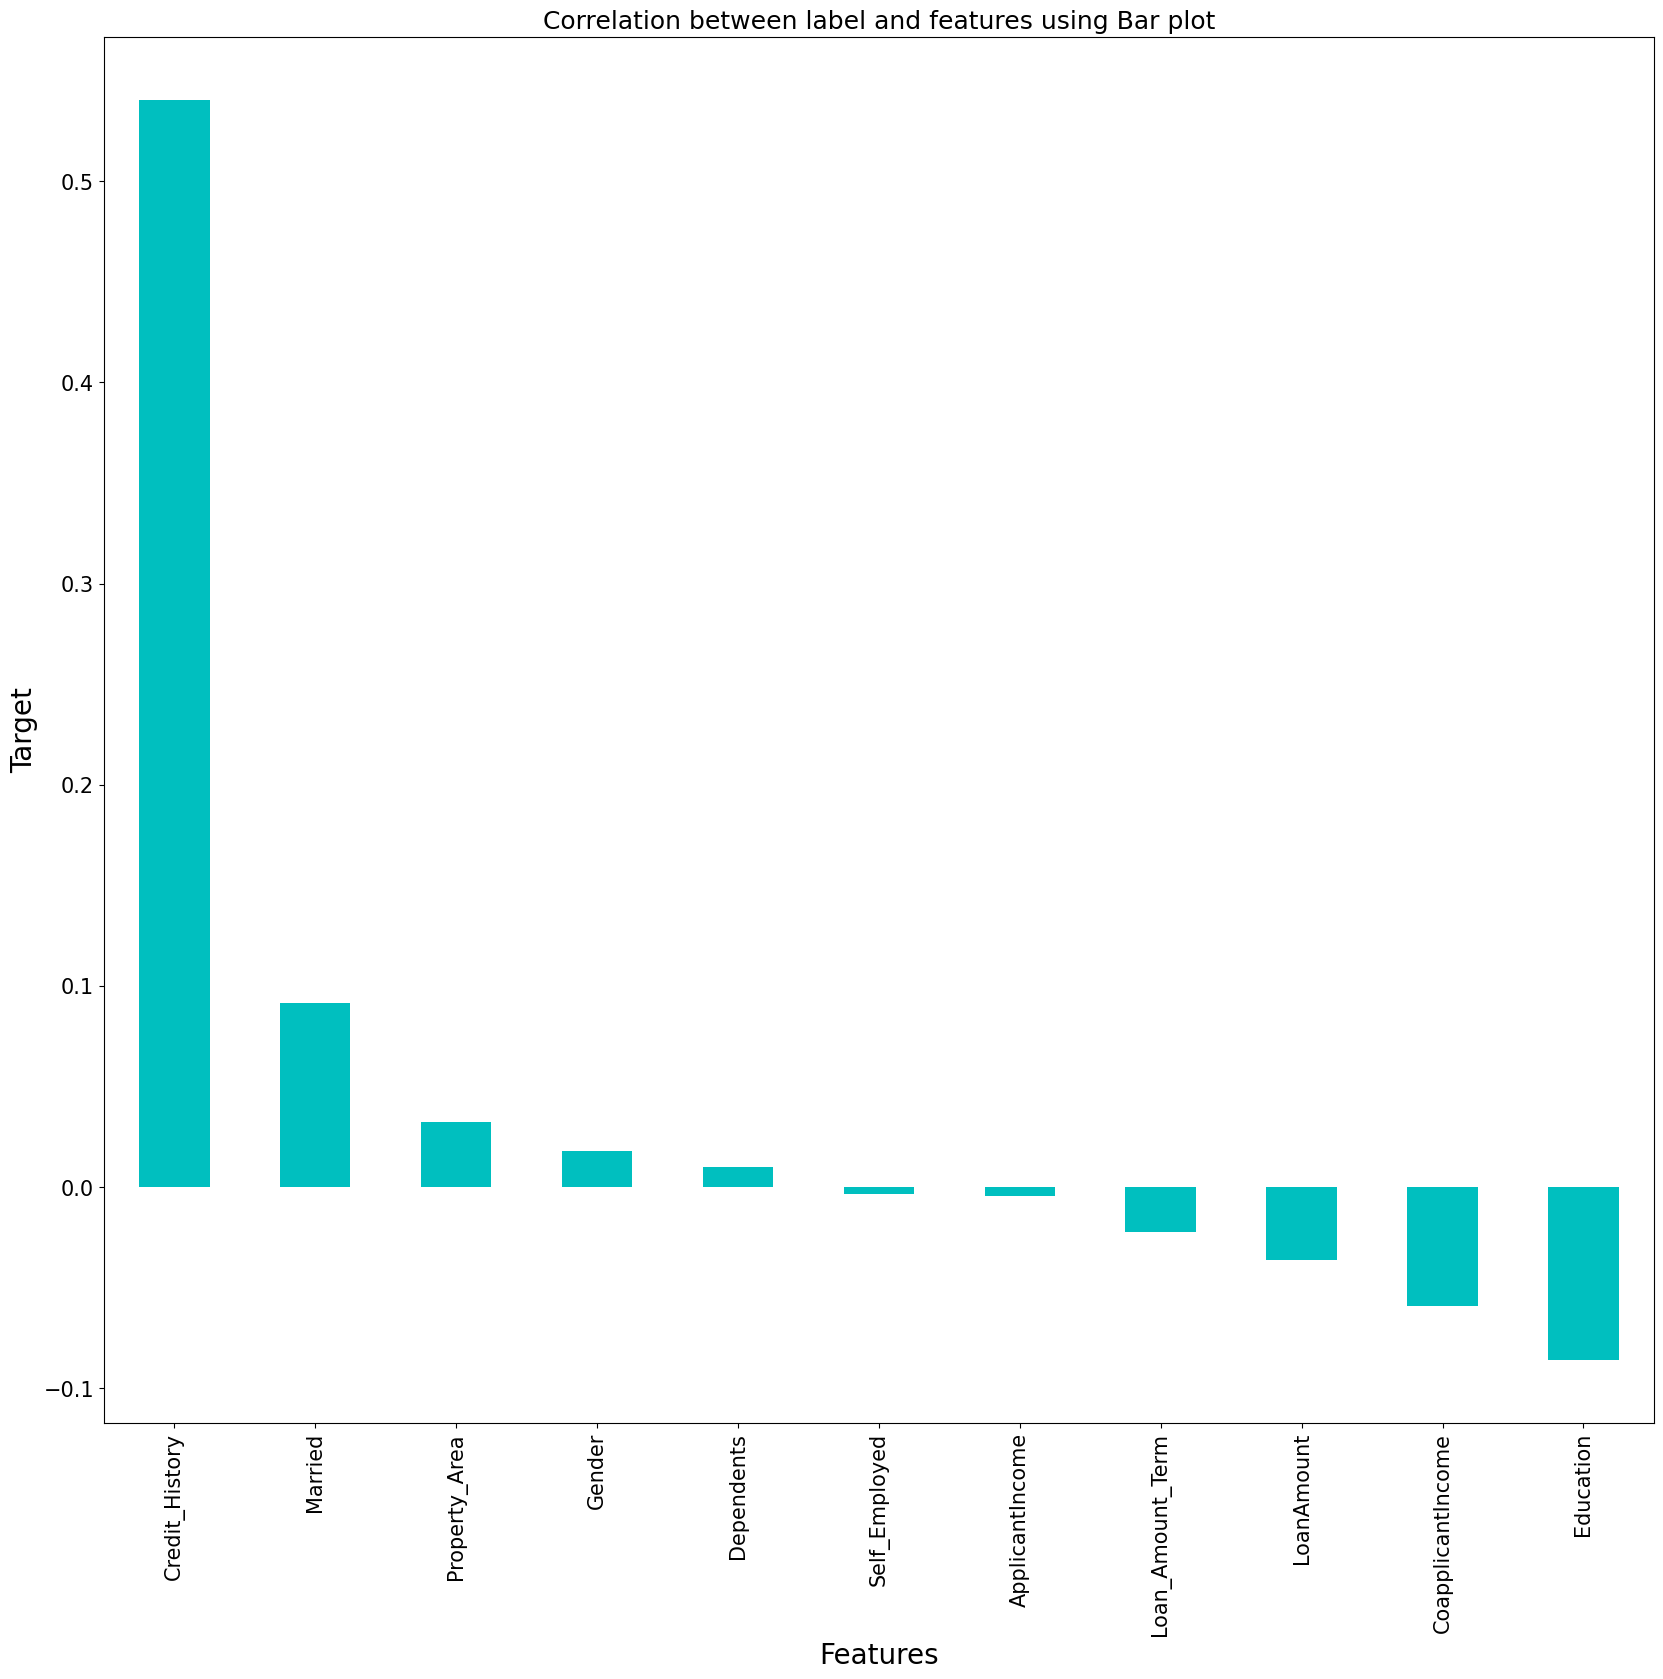

In [153]:
plt.figure(figsize=(20,18))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

POSITIVELY CORRELATED COLUMN-:

['Credit_History', 'Married', 'Property_Area', 'Dependents']

NEGATIVELY CORRELATED COLUMN-:

['Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome', 'Education']

# Checking Skewness

In [154]:
df_cont.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We can see that all columns are highly skewed

Setting skewness limit to -0.65 to +0.65

# Checking for Outliers

In [155]:
df_cont.shape

(614, 5)

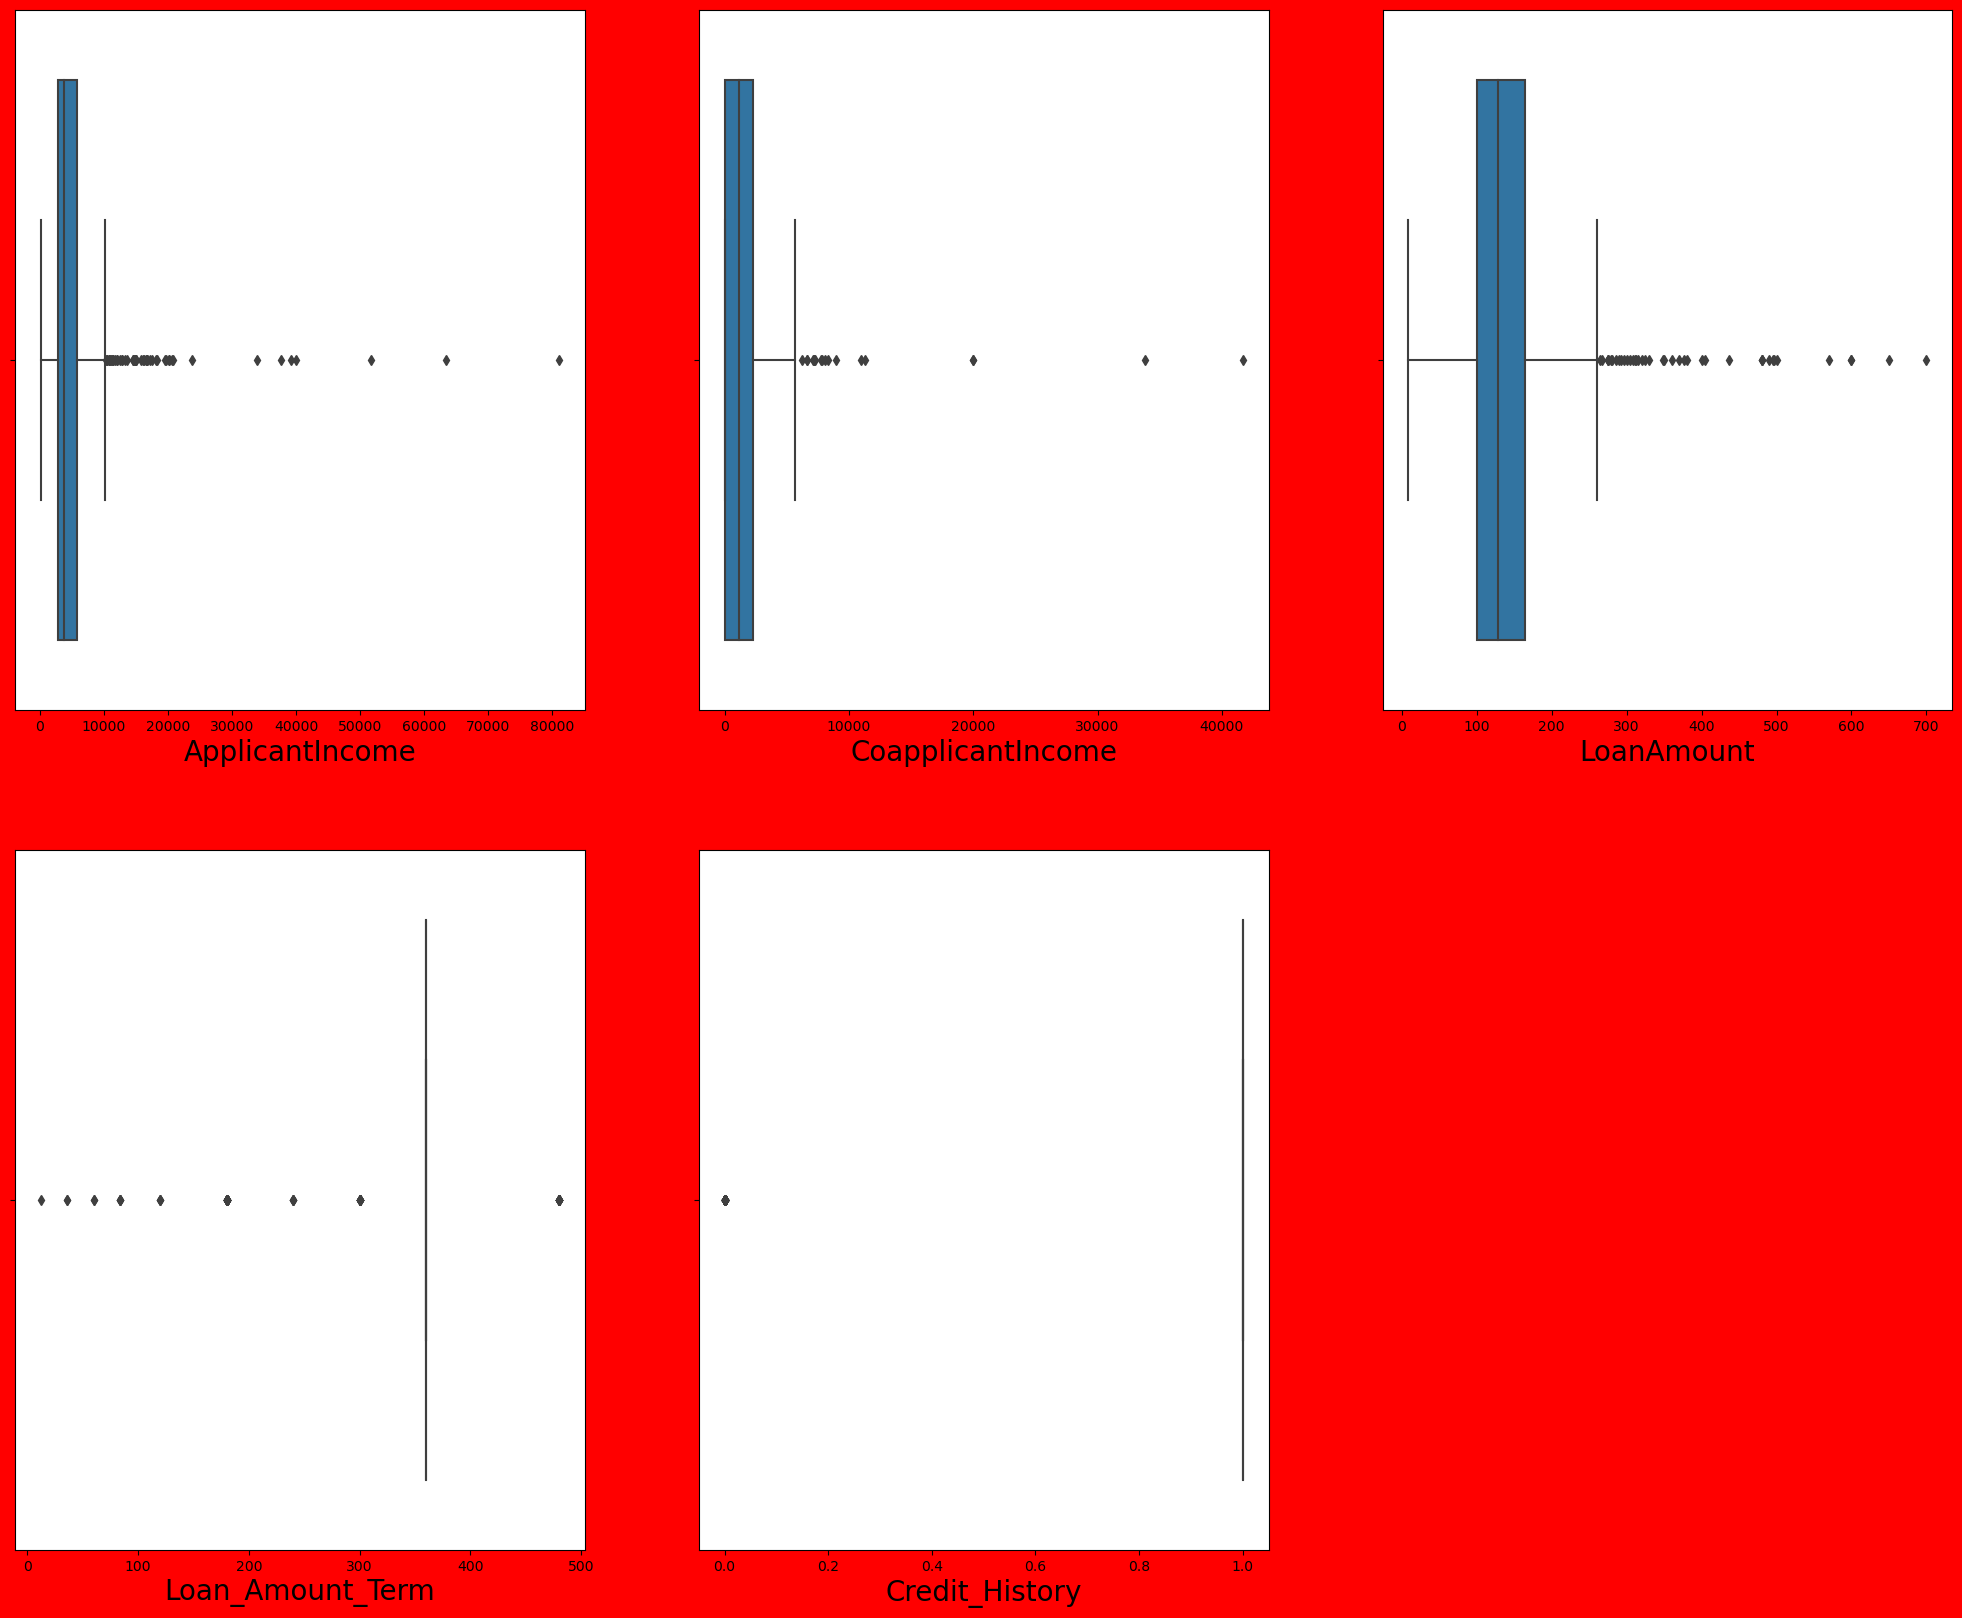

In [156]:
plt.figure(figsize=(25,20),facecolor= 'red')
plotnumber = 1


for column in df_cont:
    if plotnumber<=5:
        plt.subplot(2,3,plotnumber)
        ax=sns.boxplot(df_cont[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can observe that all columns are having outliers.

In [157]:
df=df.drop(columns=['Self_Employed','ApplicantIncome'],axis=1)

Dropping columns having no relationship with target variable.

In [158]:
df

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0.0,187.000000,360.0,1.0,2,1


# Data Preprocessing

# Removing Outliers using Z-technique

In [159]:
df_cont.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [160]:
num_col.remove("ApplicantIncome")

In [161]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_col]))
z.shape
z

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.554487,0.000000,0.273231,0.411733
1,0.038732,0.219273,0.273231,0.411733
2,0.554487,0.957641,0.273231,0.411733
3,0.251980,0.314547,0.273231,0.411733
4,0.554487,0.064454,0.273231,0.411733
...,...,...,...,...
609,0.554487,0.898095,0.273231,0.411733
610,0.554487,1.267279,2.522836,0.411733
611,0.472404,1.269371,0.273231,0.411733
612,0.554487,0.483367,0.273231,0.411733


In [162]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (614, 10)
new dataframe (582, 10)
total number of rows dropped 32


We can observe that total number of rows dropped is 32.

# Percentage data loss

In [163]:
loss_percent=(614-582)/582*100
loss_percent

5.498281786941581

We can see that data loss is less than 10%.So its safe to remove outliers.

# Seperating features and target variable as x and y

In [164]:
x=df_new.drop(columns=['Loan_Status'],axis=1)
y=df_new['Loan_Status']

In [165]:
print(x.shape)
print(y.shape)

(582, 9)
(582,)


# Handling imbalanced dataset

In [166]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

We can observe that dataset is imbalanced , we need to balance it.

# Over sampling using SMOTE

In [167]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [168]:
from imblearn.over_sampling import SMOTE

over_smpl=SMOTE(sampling_strategy=0.8)
x,y=over_smpl.fit_resample(x,y)

y.value_counts()

1    401
0    320
Name: Loan_Status, dtype: int64

# Removing skewness using data transforamtion

In [169]:
from sklearn.preprocessing import power_transform

x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.50389785, -1.2226241 , -0.76445643, ...,  0.10652124,
         0.54460018,  1.25032525],
       [ 0.50389785,  0.81791288,  1.0425308 , ...,  0.10652124,
         0.54460018, -1.25267152],
       [ 0.50389785,  0.81791288, -0.76445643, ...,  0.10652124,
         0.54460018,  1.25032525],
       ...,
       [-1.9845292 , -1.2226241 , -0.76445643, ...,  1.3602609 ,
         0.54460018,  0.17608728],
       [ 0.50389785, -1.2226241 , -0.76445643, ...,  0.10652124,
        -0.0543996 ,  0.17608728],
       [ 0.50389785,  0.81791288, -0.76445643, ...,  0.10652124,
        -1.94910246,  0.17608728]])

In [170]:
x=pd.DataFrame(x_new,columns=x.columns)

In [171]:
x.skew()

Gender              -1.483720
Married             -0.405555
Dependents           0.581121
Education            1.527225
CoapplicantIncome   -0.146140
LoanAmount           0.044285
Loan_Amount_Term     0.700319
Credit_History      -1.349868
Property_Area       -0.102268
dtype: float64

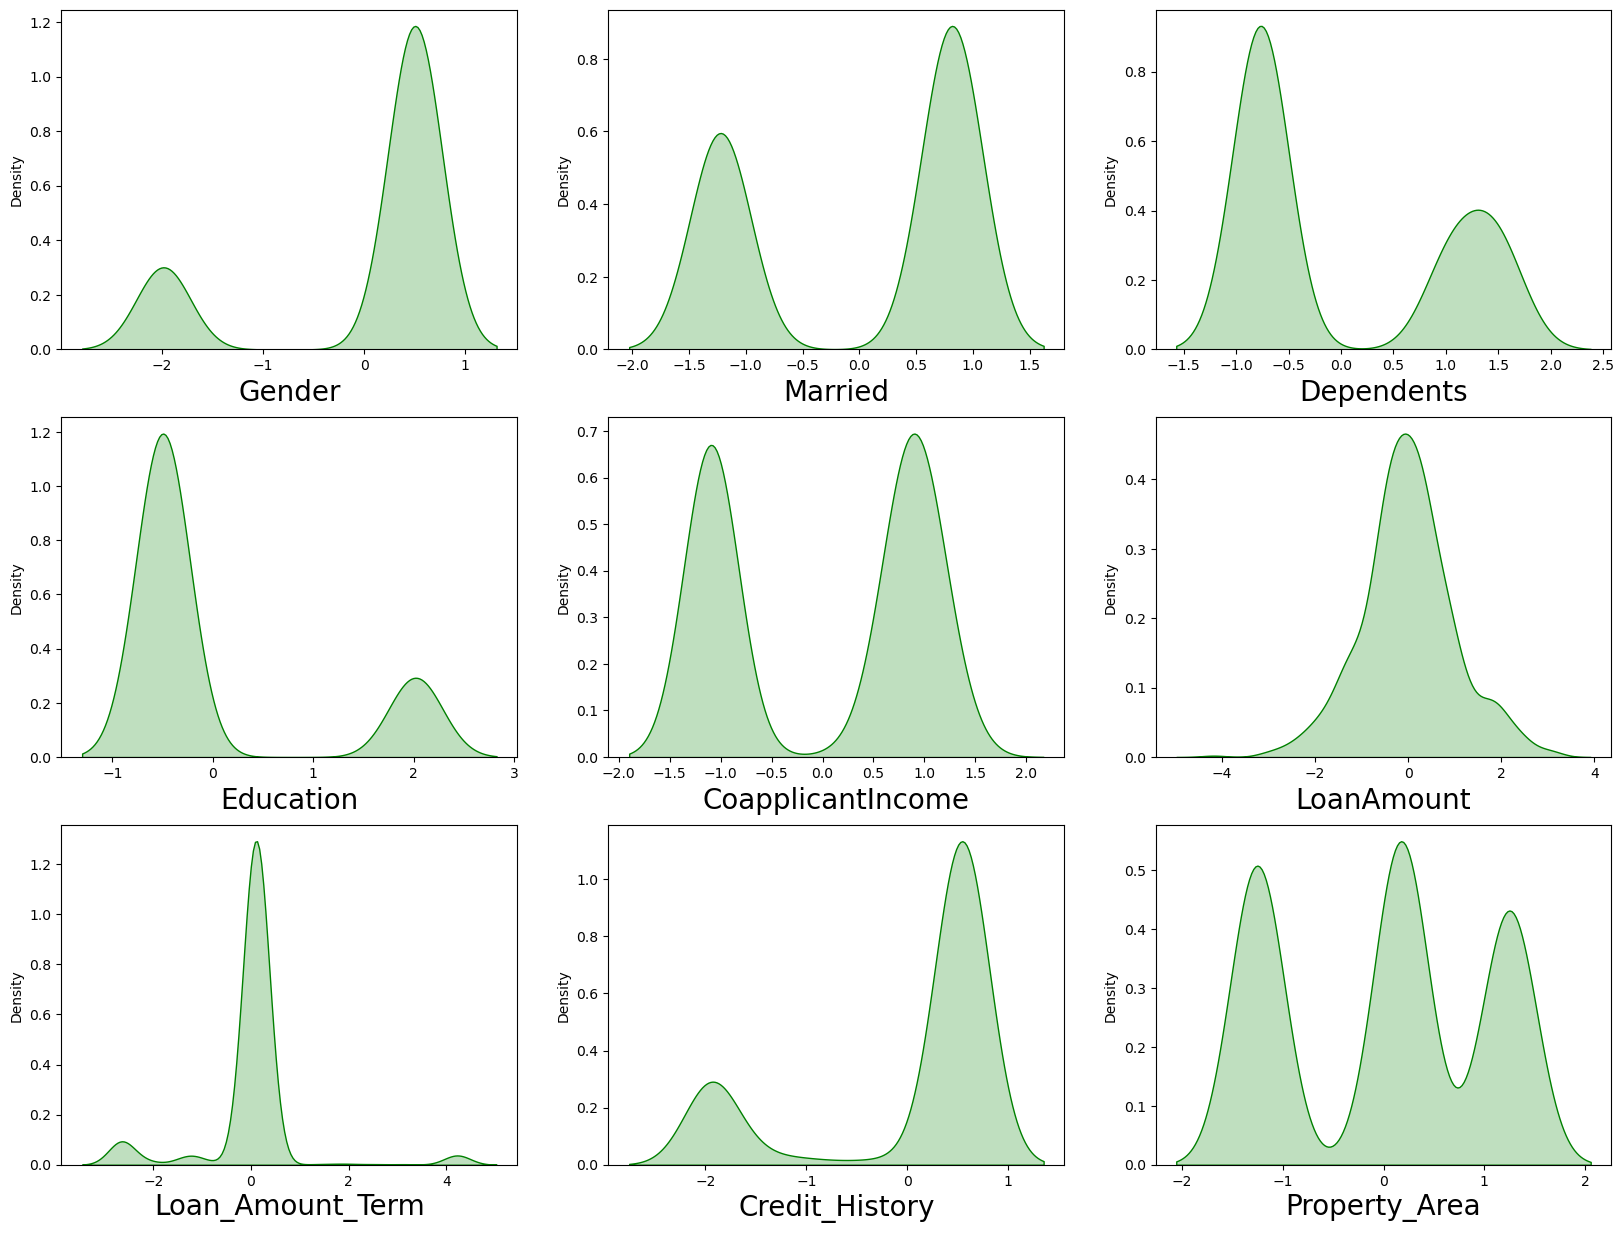

In [172]:
#Lets check the distribution of continous columns after datatransformation
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

We can observe that skewness is removed.

# Data Standardisation

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.503898,-1.222624,-0.764456,-0.495228,-1.093403,0.290110,0.106521,0.544600,1.250325
1,0.503898,0.817913,1.042531,-0.495228,0.776434,-0.039263,0.106521,0.544600,-1.252672
2,0.503898,0.817913,-0.764456,-0.495228,-1.093403,-1.457914,0.106521,0.544600,1.250325
3,0.503898,0.817913,-0.764456,2.019273,0.918490,-0.192126,0.106521,0.544600,1.250325
4,0.503898,-1.222624,-0.764456,-0.495228,-1.093403,0.196267,0.106521,0.544600,1.250325
...,...,...,...,...,...,...,...,...,...
716,0.503898,0.817913,-0.764456,-0.495228,0.882031,-0.381120,0.106521,-1.949102,0.176087
717,-1.984529,-1.222624,-0.764456,-0.495228,0.843791,-0.276458,0.106521,-1.949102,0.176087
718,-1.984529,-1.222624,-0.764456,-0.495228,-1.093403,-0.344381,1.360261,0.544600,0.176087
719,0.503898,-1.222624,-0.764456,-0.495228,-1.093403,-1.239629,0.106521,-0.054400,0.176087


# Check for multicolliinearity

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.242153,Gender
1,1.463020,Married
2,1.181578,Dependents
3,1.045852,Education
4,1.202016,CoapplicantIncome
5,1.120183,LoanAmount
6,1.031841,Loan_Amount_Term
7,1.018167,Credit_History
8,1.041940,Property_Area


We can see that VIF value is less than 5 for all columns .So there is no multicollinearity.

# Model Training and Building

# Support Vector Machine(SVM)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

# Finding the best random state

In [176]:
max_acc=0
max_rs=0

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svm=SVC()
    svm.fit(x_train,y_train)
    pred_svm=svm.predict(x_test)
    accuracy=accuracy_score(y_test,pred_svm)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.7310344827586207 random state 0
max_accuracy 0.7310344827586207 max_random_state 0
Testing accuracy 0.7862068965517242 random state 1
max_accuracy 0.7862068965517242 max_random_state 1
Testing accuracy 0.7586206896551724 random state 2
Testing accuracy 0.8275862068965517 random state 3
max_accuracy 0.8275862068965517 max_random_state 3
Testing accuracy 0.7931034482758621 random state 4
Testing accuracy 0.7931034482758621 random state 5
Testing accuracy 0.7586206896551724 random state 6
Testing accuracy 0.7655172413793103 random state 7
Testing accuracy 0.7103448275862069 random state 8
Testing accuracy 0.8275862068965517 random state 9
Testing accuracy 0.8 random state 10
Testing accuracy 0.7793103448275862 random state 11
Testing accuracy 0.7724137931034483 random state 12
Testing accuracy 0.7793103448275862 random state 13
Testing accuracy 0.7586206896551724 random state 14
Testing accuracy 0.7586206896551724 random state 15
Testing accuracy 0.7724137931034483 rand

We are getting maximum accuracy at random state 41

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=0.20)

In [178]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [179]:
svm.fit(x_train,y_train)

SVC()

In [180]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:78.819444%


In [181]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:81.379310%
Classification report
               precision    recall  f1-score   support

           0       0.88      0.63      0.73        59
           1       0.79      0.94      0.86        86

    accuracy                           0.81       145
   macro avg       0.83      0.78      0.79       145
weighted avg       0.82      0.81      0.81       145



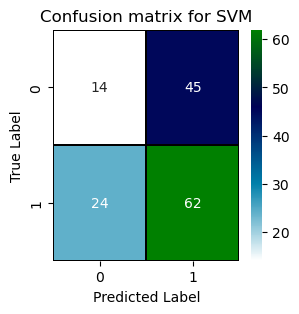

In [182]:
# Lets plot confusion matrix for SVM
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_svm)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVM")
plt.show()

# Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rf=RandomForestClassifier()

In [185]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [186]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.826389%


In [187]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:83.448276%
Classification report
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        59
           1       0.91      0.80      0.85        86

    accuracy                           0.83       145
   macro avg       0.83      0.84      0.83       145
weighted avg       0.85      0.83      0.84       145



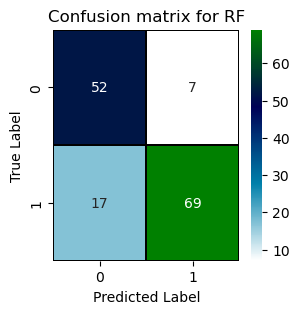

In [188]:
# Lets plot confusion matrix for SVM
pred_rf=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_rf)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RF")
plt.show()

# KNN

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
knn=KNeighborsClassifier()

In [191]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [192]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:82.118056%


In [193]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:71.724138%
Classification report
               precision    recall  f1-score   support

           0       0.65      0.66      0.66        59
           1       0.76      0.76      0.76        86

    accuracy                           0.72       145
   macro avg       0.71      0.71      0.71       145
weighted avg       0.72      0.72      0.72       145



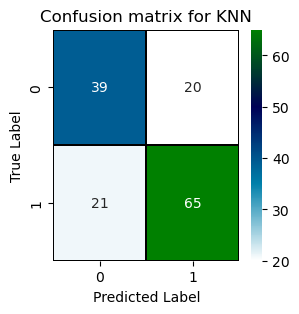

In [194]:
# Lets plot confusion matrix for KNN
pred_knn=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_knn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN")
plt.show()

# Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
lr=LogisticRegression()

In [197]:
lr.fit(x_train,y_train)

LogisticRegression()

In [198]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:76.215278%


In [199]:
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:83.448276%
Classification report
               precision    recall  f1-score   support

           0       0.93      0.64      0.76        59
           1       0.80      0.97      0.87        86

    accuracy                           0.83       145
   macro avg       0.86      0.80      0.82       145
weighted avg       0.85      0.83      0.83       145



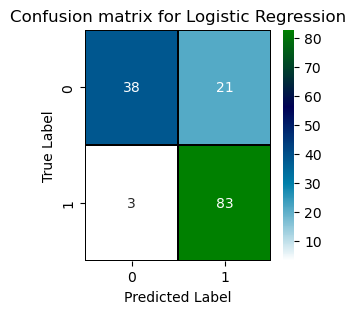

In [200]:
# Lets plot confusion matrix for Logistic Reg
pred_lr=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_lr)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Logistic Regression")
plt.show()

# Ada Boosting

In [201]:
from sklearn.ensemble import AdaBoostClassifier

In [202]:
ada=AdaBoostClassifier()

In [203]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [204]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:82.465278%


In [205]:
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:83.448276%
Classification report
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        59
           1       0.83      0.91      0.87        86

    accuracy                           0.83       145
   macro avg       0.84      0.82      0.82       145
weighted avg       0.84      0.83      0.83       145



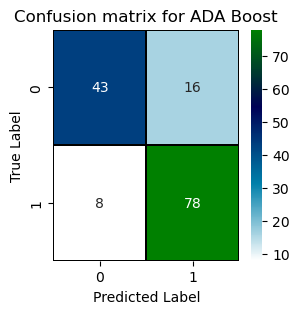

In [206]:
# Lets plot confusion matrix for ADA Boost
pred_ada=ada.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_ada)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for ADA Boost")
plt.show()

# Cross Validation Score

# Finding best Cross validation value

In [207]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 76.83864265927977

cv at  3
Cross validation score is :- 78.505071461503

cv at  4
Cross validation score is :- 78.92418661755678

cv at  5
Cross validation score is :- 79.0603448275862

cv at  6
Cross validation score is :- 80.30532598714416

cv at  7
Cross validation score is :- 79.8890429958391

cv at  8
Cross validation score is :- 80.58150183150184

cv at  9
Cross validation score is :- 80.86076817558299



We are getting minimum difference between testing accuracy and cross val score at cv=6

In [208]:
from sklearn.model_selection import cross_val_score

lssscore_selected=cross_val_score(svm,x,y,cv=6).mean()
print("the cross validation score for SVM is ",lssscore_selected)

lssscore_selected=cross_val_score(knn,x,y,cv=6).mean()
print("the cross validation score for KNN is ",lssscore_selected)

lssscore_selected=cross_val_score(ada,x,y,cv=6).mean()
print("the cross validation score for ADA is ",lssscore_selected)

lssscore_selected=cross_val_score(rf,x,y,cv=6).mean()
print("the cross validation score for RF is ",lssscore_selected)

lssscore_selected=cross_val_score(lr,x,y,cv=6).mean()
print("the cross validation score for LR is ",lssscore_selected)

the cross validation score for SVM is  0.7656336088154271
the cross validation score for KNN is  0.743388429752066
the cross validation score for ADA is  0.7684228650137741
the cross validation score for RF is  0.7961547291092747
the cross validation score for LR is  0.7683999081726355


# Conclusion

We can observe that at random state 41 and cv=6

SVM

------Testing Accuracy:85.51 and Cross val score:78.36--------

Random Forest

------Testing Accuracy:84.82 and Cross val score:80.30--------

KNN

------Testing Accuracy:77.24 and Cross val score:75.17--------

ADA Boosting

------ Testing Accuracy:86.89 and Cross val score:76.98--------

Logistic Regression

------ Testing Accuracy:88.96 and Cross val score:78.50--------

# Plotting auc for all models

Text(0.5, 1.0, 'Recieving operating characterstics')

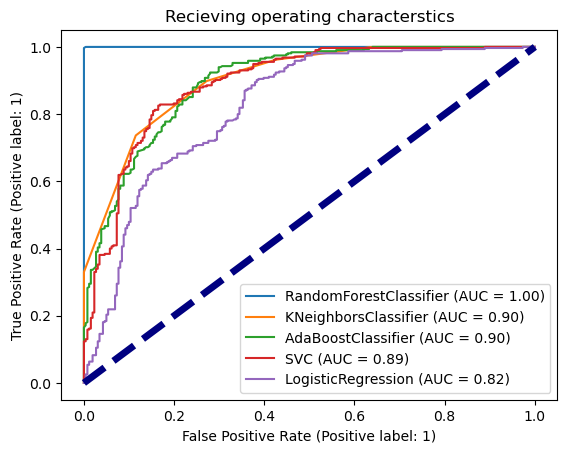

In [209]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


disp=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svm,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')

# We can say that RANDOM fOREST is the best model as it has least difference between testing accuracy and Cross validation Score, also have maximum AUC score

# Hyperparameter Tuning

In [210]:
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier
params = {'criterion':["gini","entropy"],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             "min_samples_leaf":[2,3,4,5,6],
         'min_samples_split':[2,3,4,5,6,7,8]}

In [211]:
grd=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [212]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [213]:
print('best_parameters',grd.best_params_)

best_parameters {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4}


In [214]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',min_samples_leaf=4)


In [215]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [216]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:85.590278%


In [217]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:85.517241%
Classification report
               precision    recall  f1-score   support

           0       0.90      0.73      0.80        59
           1       0.84      0.94      0.89        86

    accuracy                           0.86       145
   macro avg       0.87      0.84      0.84       145
weighted avg       0.86      0.86      0.85       145



In [218]:
lssscore_selected=cross_val_score(rf,x,y,cv=6).mean()*100
print("the cross validation score for RF is ",lssscore_selected)

the cross validation score for RF is  77.81221303948577


# Saving the best model

In [219]:
import pickle
pickle.dump(rf,open('classmodel_loan','wb'))